In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

In [131]:
sns.set(style="whitegrid")
bi_palette = ["#2fcdfd", "#ffae42"]
three_set_palette = ["#ffffff", "#2fcdfd", "#ffae42"]
four_set_palette = ["#ffffff", "#2fcdfd", "#ffae42", "#5c5c5c"]
five_set_palette = ["#ffffff", "#2fcdfd", "#ffae42", "#5c5c5c", "#ff0000"]
six_set_palette = ["#ffffff", "#2fcdfd", "#ffae42", "#5c5c5c", "#ff0000", "#ffc0cb"]

In [132]:
df = pd.read_csv('../data/bike_sharing.txt', sep=',')
df.sample(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
6141,2012-02-12 03:00:00,1,0,0,2,4.10,2.275,46,46.0022,0,14,14
2399,2011-06-07 21:00:00,2,0,1,1,29.52,34.090,70,8.9981,31,187,218
8752,2012-08-07 01:00:00,3,0,1,1,28.70,33.335,84,8.9981,2,16,18
2112,2011-05-14 22:00:00,2,0,0,3,22.14,25.760,94,11.0014,7,19,26
6387,2012-03-03 09:00:00,1,0,0,3,15.58,19.695,87,6.0032,7,87,94


In [133]:
print("Shape of the data: ", df.shape)
print("The Given Dataset has {} rows and {} columns".format(df.shape[0], df.shape[1]))
print("Columns: ", df.columns.to_list())

Shape of the data:  (10886, 12)
The Given Dataset has 10886 rows and 12 columns
Columns:  ['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']


In [134]:
df['datetime'].min(), df['datetime'].max()

('2011-01-01 00:00:00', '2012-12-19 23:00:00')

### 🕵🏽‍♂️ Shape and Structure:

* The dataset comprises 10,886 rows and 12 columns, representing a substantial volume of transactional data. 
* Each row corresponds to a total number bike rental for a specific hour interval.
* Data is provided for the time period of 2011-01-01 00:00:00 and 2012-12-19 23:00:00

In [135]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [137]:
df.duplicated().sum()

0

### 🕵🏽‍♂️ Dataset Information:

* **Data Consistency**: All columns have the same non-null count, indicating no missing values in the dataset.
* **Data Types**: Columns are classified into integer, float and object types.

In [138]:
df['datetime'] = pd.to_datetime(df['datetime']) # convert to datetime

df['date'] = df['datetime'].dt.date # extract date
df['date'] = df['date'].astype('datetime64[ns]')

## Converting the data types of the columns to category
for col in ['season','holiday','workingday','weather']:
    df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  date        10886 non-null  datetime64[ns]
dtypes: category(4), datetime64[ns](2), float64(3), int64(4)
memory usage: 808.7 KB


In [139]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
datetime,10886,2011-12-27 05:56:22.399411968,2011-01-01 00:00:00,2011-07-02 07:15:00,2012-01-01 20:30:00,2012-07-01 12:45:00,2012-12-19 23:00:00,NaN
temp,10886.0,20.23086,0.82,13.94,20.5,26.24,41.0,7.79159
atemp,10886.0,23.655084,0.76,16.665,24.24,31.06,45.455,8.474601
humidity,10886.0,61.88646,0.0,47.0,62.0,77.0,100.0,19.245033
windspeed,10886.0,12.799395,0.0,7.0015,12.998,16.9979,56.9969,8.164537
casual,10886.0,36.021955,0.0,4.0,17.0,49.0,367.0,49.960477
registered,10886.0,155.552177,0.0,36.0,118.0,222.0,886.0,151.039033
count,10886.0,191.574132,1.0,42.0,145.0,284.0,977.0,181.144454
date,10886,2011-12-26 18:23:52.592320256,2011-01-01 00:00:00,2011-07-02 00:00:00,2012-01-01 00:00:00,2012-07-01 00:00:00,2012-12-19 00:00:00,NaN


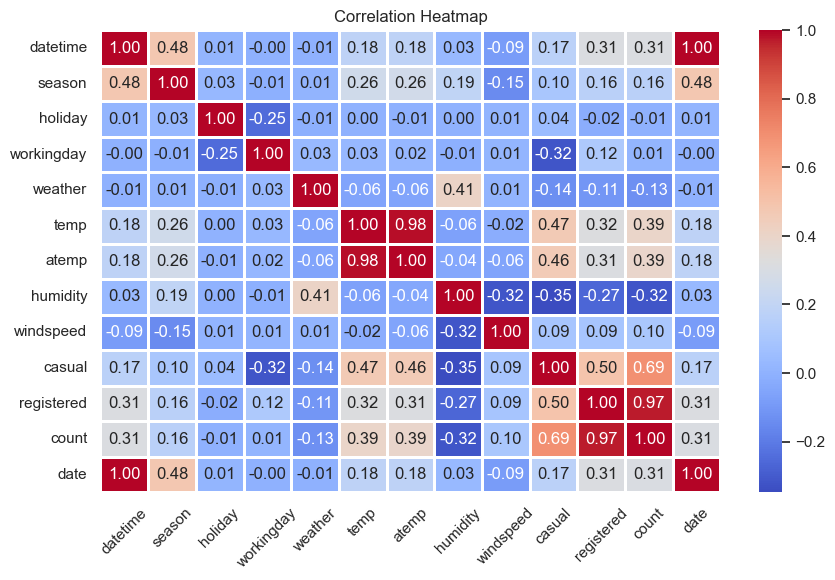

In [140]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=2)
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='temp', ylabel='atemp'>

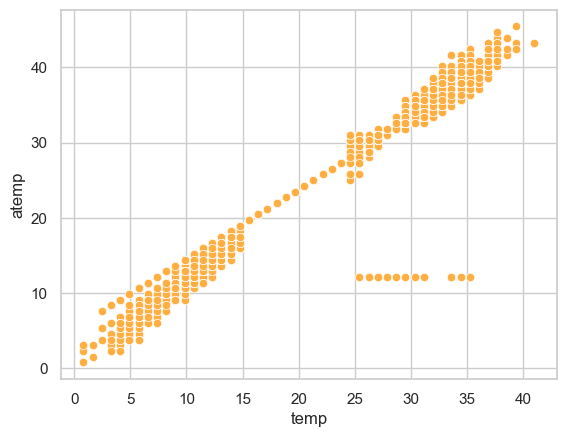

In [142]:
sns.scatterplot(x='temp', y='atemp', data=df, color='#ffae42')

### 🕵🏽‍♂️ Attribute Correlation:

* Notably, variables like *datetime, season, temp, atemp, humidity, casual, registered, and count* exhibit moderate to strong positive correlations
* variables like *windspeed, holiday, workingday, and weather* show weak correlations with demand, suggesting they might have a lesser impact or are less influential in determining cycle usage.

In [143]:
## Dropping the 'atemp' column
df.drop('atemp', axis=1, inplace=True)

df['season'] = df['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
df['weather'] = df['weather'].map({1: 'Clear', 2: 'Mist', 3: 'Light Snow, Light Rain', 4: 'Heavy Rain'})
df['holiday'] = df['holiday'].map({0: 'No', 1: 'Yes'})
df['workingday'] = df['workingday'].map({0: 'No', 1: 'Yes'})

#### Analysis 👨‍🔬

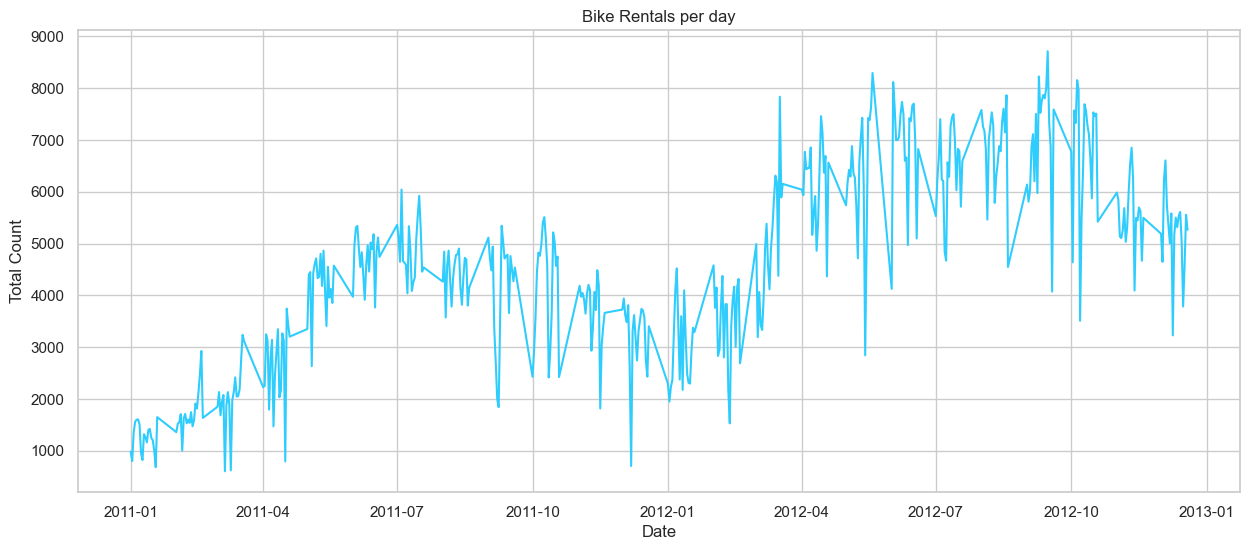

In [145]:
plt.figure(figsize=(15, 6))
# df.groupby('date')['count'].sum().plot()
sns.lineplot(x='date', y='count', data=df.groupby('date')['count'].sum().reset_index(), color='#2fcdfd')
plt.xlabel('Date')
plt.ylabel('Total Count')
plt.title('Bike Rentals per day')
plt.show()


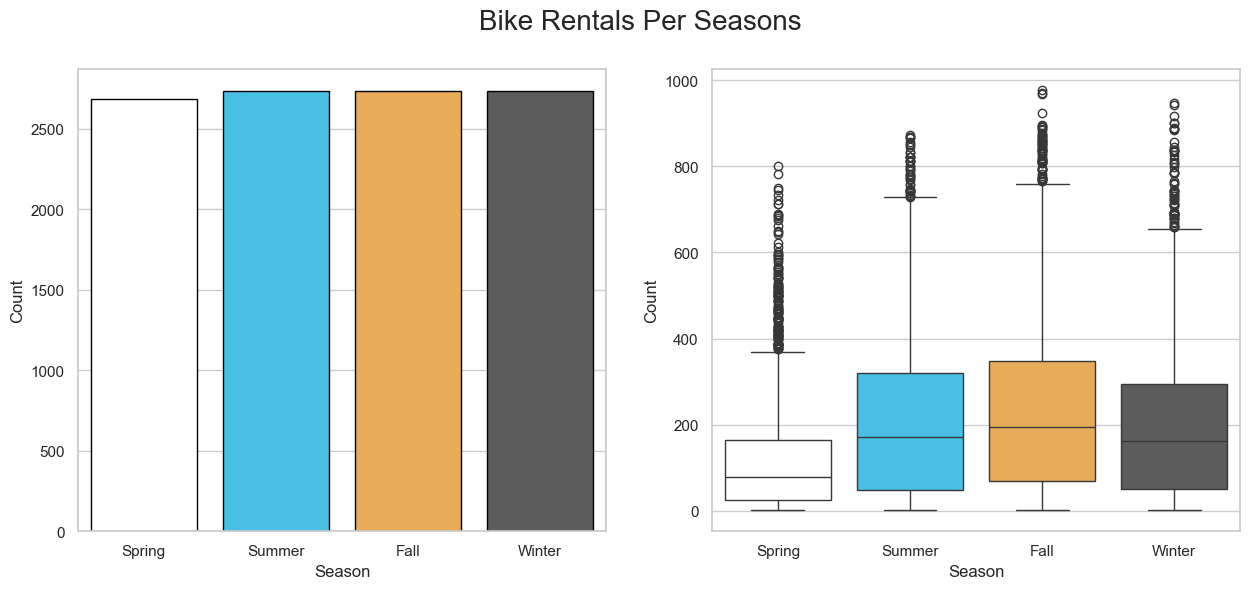

In [146]:
plt.figure(figsize=(15, 6))
plt.suptitle('Bike Rentals Per Seasons', fontsize=20)

plt.subplot(1, 2, 1)
sns.countplot(x='season', data=df, palette=four_set_palette, edgecolor='black')
# df['season'].value_counts().plot(kind='pie', color=bi_palette)
plt.xlabel('Season')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.boxplot(x='season', y='count', data=df, palette=four_set_palette)
plt.xlabel('Season')
plt.ylabel('Count')

plt.show()

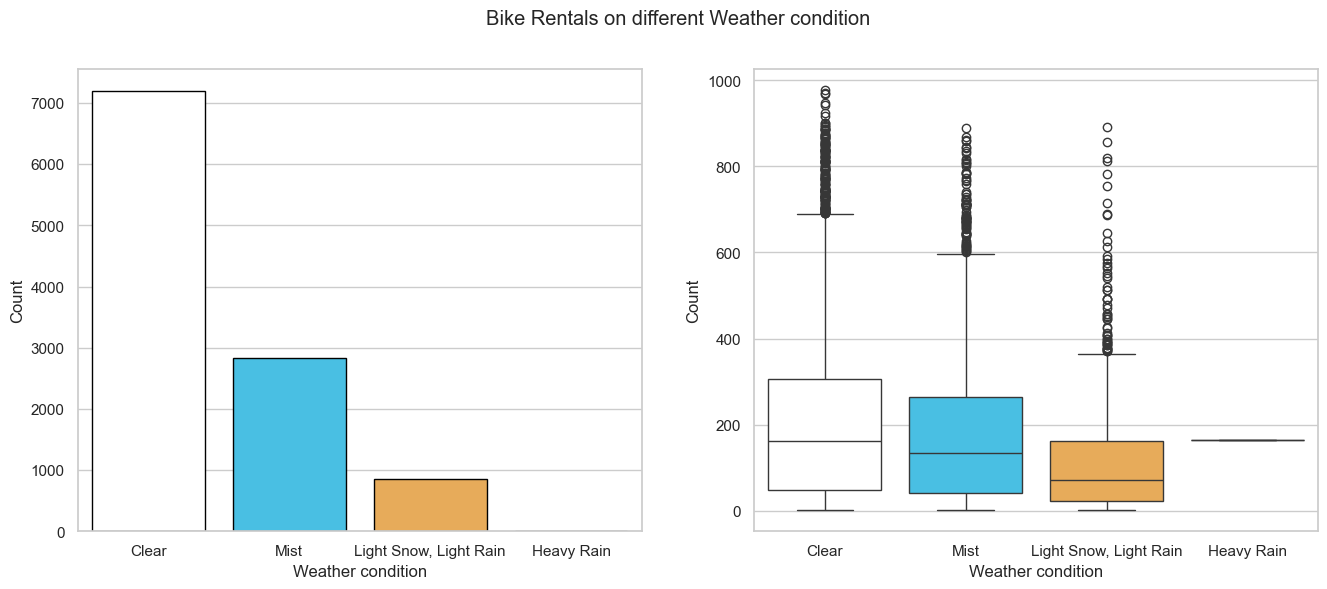

In [147]:
plt.figure(figsize=(16, 6))
plt.suptitle('Bike Rentals on different Weather condition')

plt.subplot(1, 2, 1)
sns.countplot(x='weather', data=df, palette=four_set_palette, edgecolor='black')
# df['season'].value_counts().plot(kind='pie', color=bi_palette)
plt.xlabel('Weather condition')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.boxplot(x='weather', y='count', data=df, palette=four_set_palette)
plt.xlabel('Weather condition')
plt.ylabel('Count')
plt.show()

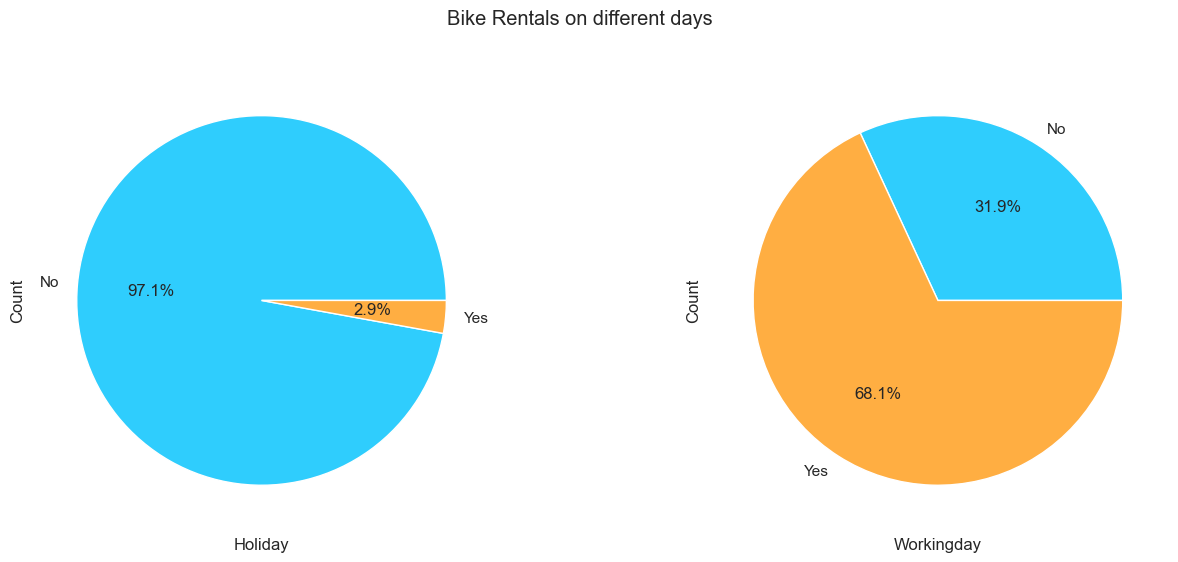

In [153]:
plt.figure(figsize=(16, 6))
plt.suptitle('Bike Rentals on different days')

plt.subplot(1, 2, 1)
df_ = df['holiday'].value_counts().sort_index()
plt.pie(df_, labels=df_.index, colors=bi_palette, autopct='%1.1f%%')
plt.xlabel('Holiday')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
df_ = df['workingday'].value_counts().sort_index()
plt.pie(df_, labels=df_.index, colors=bi_palette, autopct='%1.1f%%')
plt.xlabel('Workingday')
plt.ylabel('Count')
plt.show()

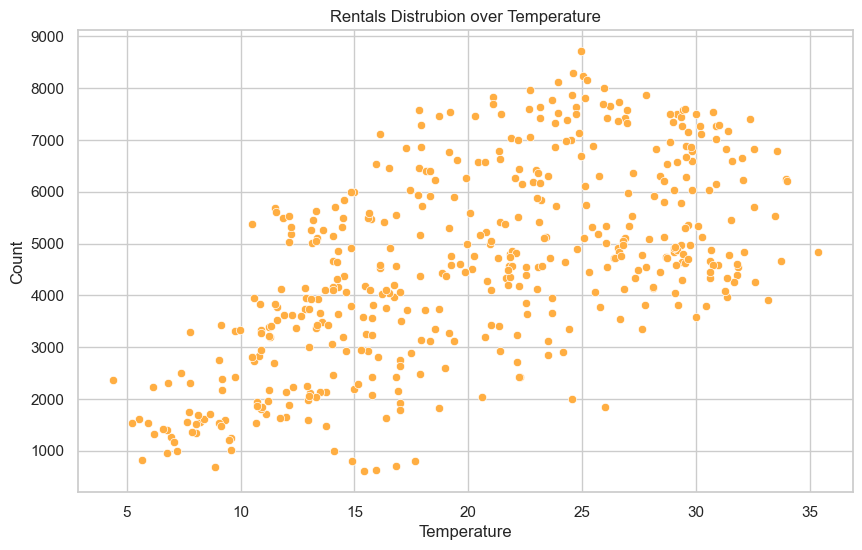

In [160]:
plt.figure(figsize=(10, 6))
df_ = df.groupby('date').agg({'temp':'mean','count': 'sum'}).reset_index()
sns.scatterplot(x='temp', y='count', data=df_, color='#ffae42')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Rentals Distrubion over Temperature')
plt.show()

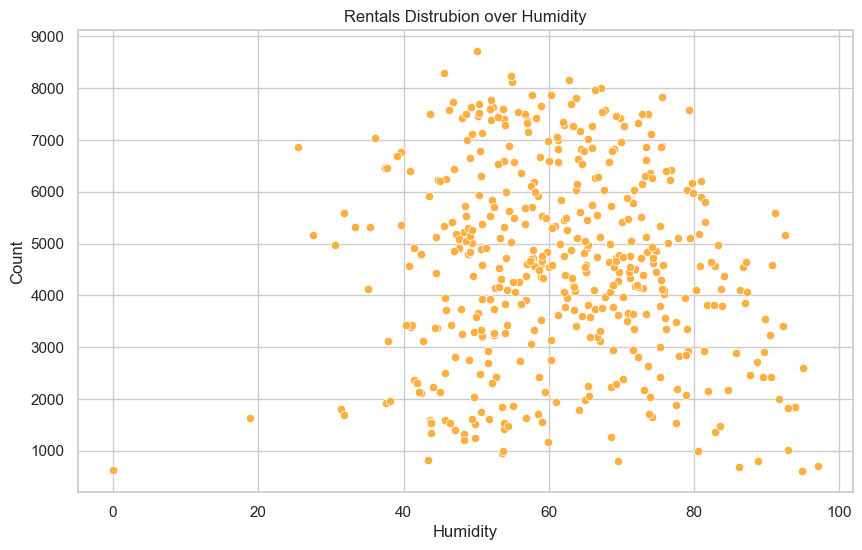

In [161]:
plt.figure(figsize=(10, 6))
df_ = df.groupby('date').agg({'humidity':'mean','count': 'sum'}).reset_index()
sns.scatterplot(x='humidity', y='count', data=df_, color='#ffae42')
plt.xlabel('Humidity')
plt.ylabel('Count')
plt.title('Rentals Distrubion over Humidity')
plt.show()

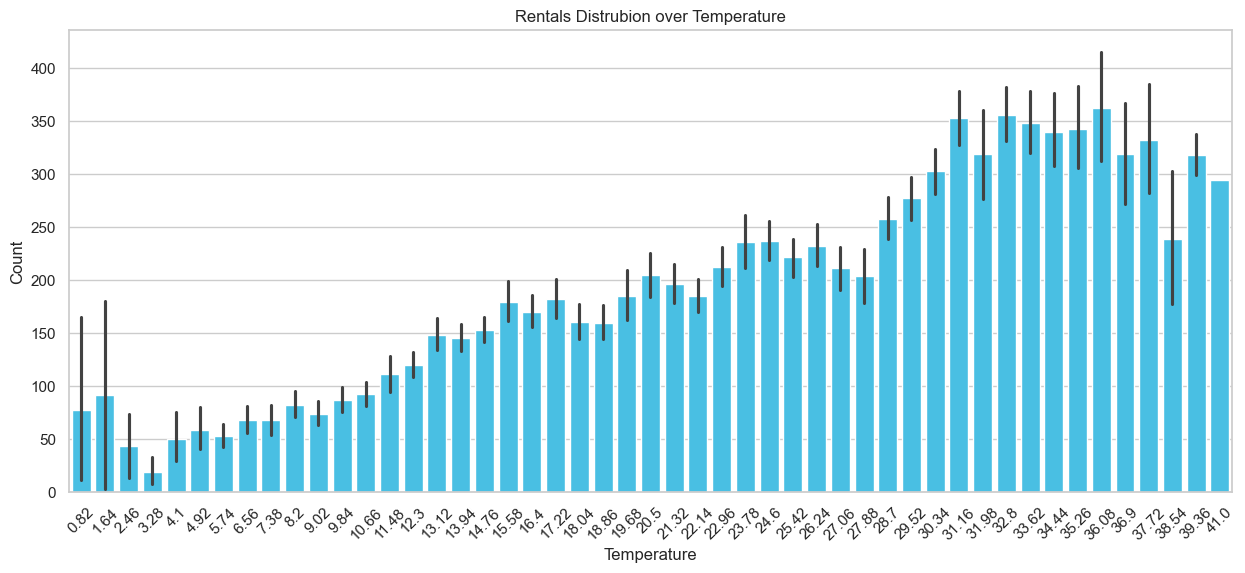

In [167]:
plt.figure(figsize=(15, 6))
sns.barplot(x='temp', y='count', data=df, color='#2fcdfd')
plt.xlabel('Temperature')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.title('Rentals Distrubion over Temperature')
plt.show()

### Hypothesis Testing 🧪

#### Does Working Day has an effect on the number of electric cycles rented

In [170]:
# Null Hypothesis: There is no significant difference in the number of electric cycles rented on working days and non-working days
# Alternative Hypothesis: There is a significant difference in the number of electric cycles rented on working days and non-working days


working_day = df[df['workingday'] == 'Yes']['count']
non_working_day = df[df['workingday'] == 'No']['count']

t_stat, p_val = stats.ttest_ind(working_day, non_working_day)
print("T-Statistic: ", t_stat)
print("P-Value: ", p_val)

if p_val < 0.05:
    print("There is a significant difference in the number of electric cycles rented on working days and non-working days. (Reject Null Hypothesis) ")

T-Statistic:  1.2096277376026694
P-Value:  0.22644804226361348


#### No. of cycles rented is similar or different in different weather

In [172]:
# Null Hypothesis: There is no significant difference in the number of electric cycles rented in different weather conditions
# Alternative Hypothesis: There is a significant difference in the number of electric cycles rented in different weather conditions

weather_1 = df[df['weather'] == 'Clear']['count']
weather_2 = df[df['weather'] == 'Mist']['count']
weather_3 = df[df['weather'] == 'Light Snow, Light Rain']['count']
weather_4 = df[df['weather'] == 'Heavy Rain']['count']

f_stat, p_val = stats.f_oneway(weather_1, weather_2, weather_3, weather_4)
print("F-Statistic: ", f_stat)
print("P-Value: ", p_val)

if p_val < 0.05:
    print("There is a significant difference in the number of electric cycles rented in different weather conditions. (Reject Null Hypothesis)")

F-Statistic:  65.53024112793271
P-Value:  5.482069475935669e-42
There is a significant difference in the number of electric cycles rented in different weather conditions. (Reject Null Hypothesis)


#### No. of cycles rented is similar or different in different season

In [182]:
# Null Hypothesis: There is no significant difference in the number of electric cycles rented in different seasons
# Alternative Hypothesis: There is a significant difference in the number of electric cycles rented in different seasons

spring = df[df['season'] == 'Spring']['count']
summer = df[df['season'] == 'Summer']['count']
fall = df[df['season'] == 'Fall']['count']
winter = df[df['season'] == 'Winter']['count']

f_stat, p_val = stats.f_oneway(spring, summer, fall, winter)
print("F-Statistic: ", f_stat)
print("P-Value: ", p_val)

if p_val < 0.05:
    print("There is a significant difference in the number of electric cycles rented in different seasons. (Reject Null Hypothesis)")

F-Statistic:  236.94671081032106
P-Value:  6.164843386499654e-149
There is a significant difference in the number of electric cycles rented in different seasons. (Reject Null Hypothesis)


#### Is Weather dependent on the season

In [177]:
# Null Hypothesis: Weather is independent of the season
# Alternative Hypothesis: Weather is dependent on the season

contingency_table = pd.crosstab(df['season'], df['weather'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print("Chi2: ", chi2)
print("P-Value: ", p)

if p < 0.05:
    print("Weather is dependent on the season. (Reject Null Hypothesis)")

Chi2:  49.158655596893624
P-Value:  1.549925073686492e-07
Weather is dependent on the season. (Reject Null Hypothesis)
